In [46]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\Data\Data Cleaning Practice\Nashville Housing Data for Data Cleaning (reuploaded).csv")

In [3]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

In [5]:
df.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,56477.000000,26015.000000,2.601500e+04,2.601500e+04,2.601500e+04,24163.000000,24157.000000,24275.000000,24144.000000
mean,28334.001133,0.498923,6.906856e+04,1.607847e+05,2.323754e+05,1963.744899,3.089912,1.886014,0.283921
std,16352.590651,1.570454,1.060401e+05,2.067999e+05,2.810643e+05,26.542982,0.852869,0.961515,0.487881
min,0.000000,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000,0.000000,0.000000,0.000000
25%,14186.000000,0.180000,2.100000e+04,7.590000e+04,1.028000e+05,1948.000000,3.000000,1.000000,0.000000
50%,28313.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.000000,3.000000,2.000000,0.000000
75%,42513.000000,0.450000,6.000000e+04,1.807000e+05,2.683500e+05,1983.000000,3.000000,2.000000,1.000000
max,56635.000000,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,11.000000,10.000000,3.000000


<Axes: >

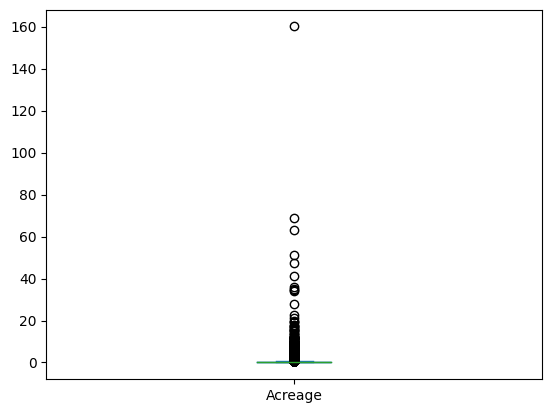

In [6]:
df.Acreage.plot(kind='box')

There seems to be an outlier in the Acreage

In [7]:
df.drop(df.loc[df.Acreage>80].index,inplace=True)

### Check and Convert `SaleDate` column to datetime

In [12]:
df.SaleDate = pd.to_datetime(df.SaleDate)

### Drop duplicated rows:

In [13]:
df.duplicated(subset=['LandUse',
                      'PropertyAddress',
                      'SaleDate',
                      'SalePrice',
                      'LegalReference',
                      'SoldAsVacant',
                      'OwnerName',	'OwnerAddress',	'Acreage',	'TaxDistrict'
                      ], keep=False).value_counts()

False    55376
True      1100
Name: count, dtype: int64

In [14]:
df.drop_duplicates(subset=['LandUse',
                      'PropertyAddress',
                      'SaleDate',
                      'SalePrice',
                      'LegalReference',
                      'SoldAsVacant',
                      'OwnerName',	'OwnerAddress',	'Acreage',	'TaxDistrict'],keep='first',inplace=True)

### Check for null values

In [57]:
df.shape

(55596, 19)

In [88]:
df.isna().sum()

UniqueID                 0
ParcelID                 0
LandUse                  0
PropertyAddress_a       35
SaleDate                 0
SalePrice                0
LegalReference           0
SoldAsVacant             0
OwnerName            30408
OwnerAddress         29654
Acreage              29654
TaxDistrict          29654
LandValue            29654
BuildingValue        29654
TotalValue           29654
YearBuilt            31488
Bedrooms             31494
FullBath             31376
HalfBath             31507
PropertyAddress_b    55532
newA                     0
dtype: int64

In [50]:
ID_noaddress = df.loc[df.PropertyAddress.isna(),['ParcelID','PropertyAddress']]

In [51]:
ID_noaddress

,ParcelID,PropertyAddress
159,025 07 0 031.00,NaN
223,026 01 0 069.00,NaN
246,026 05 0 017.00,NaN
305,026 06 0A 038.00,NaN
531,033 06 0 041.00,NaN
533,033 06 0A 002.00,NaN
665,033 15 0 123.00,NaN
858,034 03 0 059.00,NaN
1043,034 07 0B 015.00,NaN
1176,034 16 0A 004.00,NaN


In [52]:
b = df.loc[
    (df.ParcelID.isin(ID_noaddress.ParcelID)) &
    ~(df.PropertyAddress.isna()), ['ParcelID','PropertyAddress']
]

In [35]:
b

,ParcelID,PropertyAddress
158,025 07 0 031.00,"410 ROSEHILL CT, GOODLETTSVILLE"
222,026 01 0 069.00,"141 TWO MILE PIKE, GOODLETTSVILLE"
245,026 05 0 017.00,"208 EAST AVE, GOODLETTSVILLE"
304,026 06 0A 038.00,"109 CANTON CT, GOODLETTSVILLE"
530,033 06 0 041.00,"1129 CAMPBELL RD, GOODLETTSVILLE"
532,033 06 0A 002.00,"1116 CAMPBELL RD, GOODLETTSVILLE"
664,033 15 0 123.00,"438 W CAMPBELL RD, GOODLETTSVILLE"
857,034 03 0 059.00,"2117 PAULA DR, MADISON"
859,034 03 0 059.00,"2117 PAULA DR, MADISON"
1042,034 07 0B 015.00,"2524 VAL MARIE DR, MADISON"


In [30]:
b.shape

(35, 2)

In [37]:
df_copy = df.copy()

In [53]:
df = df_copy

In [72]:
df= df.merge(b,how='outer',left_on='ParcelID',right_on='ParcelID',suffixes=['_a','_b'])

In [82]:
df.PropertyAddress_b.isna().value_counts()

PropertyAddress_b
True     55532
False       84
Name: count, dtype: int64

In [86]:
df['newA'] = df.PropertyAddress_a.fillna(df.PropertyAddress_b)

### Split address columns into Street, City, State

In [106]:
df.head(1)

,UniqueID,ParcelID,LandUse,PropertyAddress_a,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,PropertyAddress_b,newA,Prop_Street,Prop_City
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,168200.0,235700.0,1986.0,3.0,3.0,0.0,NaN,"1808 FOX CHASE DR, GOODLETTSVILLE",1808 FOX CHASE DR,GOODLETTSVILLE


In [105]:
df[['Prop_Street','Prop_City']] = df.newA.str.split(',',expand=True)

In [107]:
df[['Owner_street','Owner_city','Owner_state']] = df.OwnerAddress.str.split(',',expand=True)

In [109]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress_a,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,Bedrooms,FullBath,HalfBath,PropertyAddress_b,newA,Prop_Street,Prop_City,Owner_street,Owner_city,Owner_state
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,3.0,3.0,0.0,NaN,"1808 FOX CHASE DR, GOODLETTSVILLE",1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,3.0,3.0,2.0,NaN,"1832 FOX CHASE DR, GOODLETTSVILLE",1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,4.0,3.0,0.0,NaN,"1864 FOX CHASE DR, GOODLETTSVILLE",1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,3.0,3.0,0.0,NaN,"1853 FOX CHASE DR, GOODLETTSVILLE",1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,4.0,3.0,0.0,NaN,"1829 FOX CHASE DR, GOODLETTSVILLE",1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


### Validate `SoldAsVacant` column

In [112]:
df.SoldAsVacant.dtypes

dtype('O')

In [125]:
df.SoldAsVacant.value_counts()

SoldAsVacant
No     51330
Yes     4286
Name: count, dtype: int64

In [124]:
df.loc[df.SoldAsVacant == 'N','SoldAsVacant'] = 'No'
df.loc[df.SoldAsVacant =='Y','SoldAsVacant'] = 'Yes'

In [126]:
df_copy = df.copy()

### Drop unused columns

In [133]:
df.drop(columns = ['PropertyAddress_a','PropertyAddress_b','OwnerAddress', 'TaxDistrict'],inplace=True)

In [134]:
df.head().T

,0,1,2,3,4
UniqueID,2045,16918,54582,43070,22714
ParcelID,007 00 0 125.00,007 00 0 130.00,007 00 0 138.00,007 00 0 143.00,007 00 0 149.00
LandUse,SINGLE FAMILY,SINGLE FAMILY,SINGLE FAMILY,SINGLE FAMILY,SINGLE FAMILY
SaleDate,2013-04-09 00:00:00,2014-06-10 00:00:00,2016-09-26 00:00:00,2016-01-29 00:00:00,2014-10-10 00:00:00
SalePrice,240000,366000,435000,255000,278000
LegalReference,20130412-0036474,20140619-0053768,20160927-0101718,20160129-0008913,20141015-0095255
SoldAsVacant,No,No,No,No,No
OwnerName,"FRAZIER, CYRENTHA LYNETTE","BONER, CHARLES & LESLIE","WILSON, JAMES E. & JOANNE","BAKER, JAY K. & SUSAN E.","POST, CHRISTOPHER M. & SAMANTHA C."
Acreage,2.3,3.5,2.9,2.6,2.0
LandValue,50000.0,50000.0,50000.0,50000.0,50000.0
